**Modify the previous code to solve the following the problem:**

Consider 2D heat transfer across a plate  of thermal conductivity $k = 50 $ shown in the figure below

\begin{align}
-k\Delta u & = f, & \mbox{ in } & \Omega\\
u & = T_0, & \mbox{ on sides: } & AB \cup CD \cup EF \cup GH\\
k \nabla T \cdot {\bf n}  & = g, & \mbox{  on sides: } & BC \cup DE \cup FG \cup HA  
\end{align}
where
$$f(x,y) = x^2 + y^2,$$
$$T_0 = 350,$$
$$g(x,y) = 100.$$


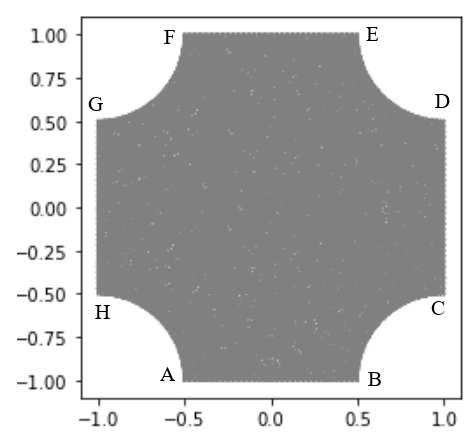

In [ ]:
# Install FEniCS
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

--2024-03-04 21:10:01--  https://fem-on-colab.github.io/releases/fenics-install-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4161 (4.1K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   4.06K  --.-KB/s    in 0s      

2024-03-04 21:10:01 (27.1 MB/s) - ‘/tmp/fenics-install.sh’ saved [4161/4161]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICS_INSTALLED=/usr/local/share/fem-on-colab/fenics.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenics.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/5fbf72c/releases/pybind11-inst

In [ ]:
from dolfin import *
from mshr import *
import matplotlib.pyplot as plt

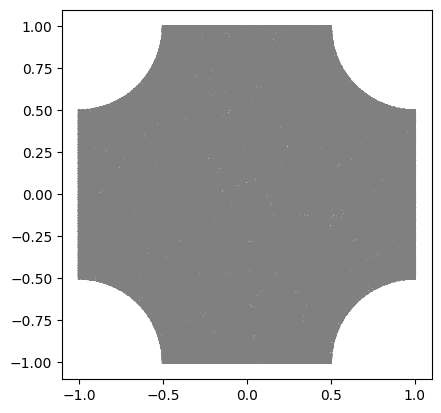

In [ ]:
# Domain definition
r = 0.5
domain = Rectangle(Point(-1, -1), Point(1, 1)) - Circle(Point(-1, -1), r) - Circle(Point(-1, 1), r) - Circle(Point(1, -1), r) - Circle(Point(1, 1), r)

# Generate mesh
mesh = generate_mesh(domain, 70)
plot(mesh)

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_ba5b6fd05547b64b67dc8127c021886173133c02

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of cell subdomains:           0
  Number of exterior_facet subdomains: 0
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              2
  Coefficients:                        '[f_170, f_171]'
  Unique elements:                     'CG1(?,?), R0(?,?), CG4(?,?), Vector<2 x CG1(
                                       ?,?)>'
  Unique sub elements:                 'CG1(?,?), R0(?,?), CG4(?,?), Vector<2 x CG1(
                      

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_17d5bd7e022a45e71c9f390bd00f3f09885a1fd0

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00385666 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0550938 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

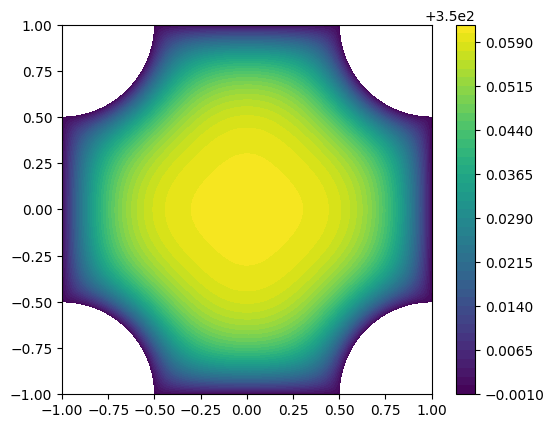

In [ ]:

# Define function space
V = FunctionSpace(mesh, 'P', 1)

# Define boundary subdomains
class LeftBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and near(x[0], -1)

class RightBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and near(x[0], 1)

class TopBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and near(x[1], 1)

class BottomBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and near(x[1], -1)

class TopRightCircle(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and sqrt((x[0]-1)**2 + (x[1]-1)**2) < r*1.1

class TopLeftCircle(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and sqrt((x[0]+1)**2 + (x[1]-1)**2) < r*1.1

class BottomRightCircle(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and sqrt((x[0]-1)**2 + (x[1]+1)**2) < r*1.1

class BottomLeftCircle(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and sqrt((x[0]+1)**2 + (x[1]+1)**2) < r*1.1

# Initialize subdomains
left_boundary = LeftBoundary()
right_boundary = RightBoundary()
top_boundary = TopBoundary()
bottom_boundary = BottomBoundary()
topRight_circle = TopRightCircle()
topLeft_circle = TopLeftCircle()
bottomRight_circle = BottomRightCircle()
bottomLeft_circle = BottomLeftCircle()

# Define boundary conditions
u_L = Constant(350.)
bc_L = DirichletBC(V, u_L, left_boundary)

u_R = Constant(350.)
bc_R = DirichletBC(V, u_R, right_boundary)

u_T = Constant(350.)
bc_T = DirichletBC(V, u_T, top_boundary)

u_B = Constant(350.)
bc_B = DirichletBC(V, u_B, bottom_boundary)

u1 = Constant(350.)
bc1 = DirichletBC(V, u1, topRight_circle)

u2 = Constant(350.)
bc2 = DirichletBC(V, u2, topLeft_circle)

u3 = Constant(350.)
bc3 = DirichletBC(V, u3, bottomRight_circle)

u4 = Constant(350.)
bc4 = DirichletBC(V, u4, bottomLeft_circle)

# Collect boundary conditions
bcs = [bc_L, bc_R, bc_T, bc_B, bc1, bc2, bc3, bc4]

g = Constant(100.)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("pow((x[0]),2) + pow((x[1]),2)", degree=4)
a = inner(grad(u), grad(v)) * dx
L = f*v*dx + g*v*ds

# Compute solution
uh = Function(V)
solve(a == L, uh, bcs)

# Plot solution
p = plot(uh)
plt.colorbar(p)
plt.show()
